## 금융 데이터 수집 라이브러리를 이용한 삼성 전자 주가 수집

In [1]:
#https://github.com/FinanceData/FinanceDataReader

import pandas as pd
import numpy as np
import FinanceDataReader

In [2]:
# !pip install finance-datareader

import FinanceDataReader as fdr

df_sam = fdr.DataReader('005930', start='2000')

print(df_sam)

# 단기로 하는게 성능이 좋음.

# 마지막 날은 아직 종가도 안나왔는데..01 19일자 벌써 종가가 나오다니 저걸 없애야함.

# 종가를 맞추는게 목적.

             Open   High    Low  Close    Volume    Change
Date                                                      
2000-01-04   6000   6110   5660   6110   1483967  0.148496
2000-01-05   5800   6060   5520   5580   1493604 -0.086743
2000-01-06   5750   5780   5580   5620   1087810  0.007168
2000-01-07   5560   5670   5360   5540    806195 -0.014235
2000-01-10   5600   5770   5580   5770    937615  0.041516
...           ...    ...    ...    ...       ...       ...
2024-01-15  73200  74000  73200  73900  13212339  0.010944
2024-01-16  73500  73700  72500  72600  14760415 -0.017591
2024-01-17  73100  73300  71000  71000  22683660 -0.022039
2024-01-18  71600  72000  70700  71700  17853397  0.009859
2024-01-19  73500  74700  73000  74700  23198458  0.041841

[5937 rows x 6 columns]


In [3]:
df_sam.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5937 entries, 2000-01-04 to 2024-01-19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5937 non-null   int64  
 1   High    5937 non-null   int64  
 2   Low     5937 non-null   int64  
 3   Close   5937 non-null   int64  
 4   Volume  5937 non-null   int64  
 5   Change  5937 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 324.7 KB


In [4]:
### 마지막 행 제거

df_sam = df_sam.drop(index=['2024-01-19'])
print(df_sam)

             Open   High    Low  Close    Volume    Change
Date                                                      
2000-01-04   6000   6110   5660   6110   1483967  0.148496
2000-01-05   5800   6060   5520   5580   1493604 -0.086743
2000-01-06   5750   5780   5580   5620   1087810  0.007168
2000-01-07   5560   5670   5360   5540    806195 -0.014235
2000-01-10   5600   5770   5580   5770    937615  0.041516
...           ...    ...    ...    ...       ...       ...
2024-01-12  73000  74100  72800  73100  13038939 -0.001366
2024-01-15  73200  74000  73200  73900  13212339  0.010944
2024-01-16  73500  73700  72500  72600  14760415 -0.017591
2024-01-17  73100  73300  71000  71000  22683660 -0.022039
2024-01-18  71600  72000  70700  71700  17853397  0.009859

[5936 rows x 6 columns]


In [5]:
### 연도별 데이터 추출 기능 
stock1= df_sam.loc['2023', :]

print(stock1)

             Open   High    Low  Close    Volume    Change
Date                                                      
2023-01-02  55500  56100  55200  55500  10031448  0.003617
2023-01-03  55400  56000  54500  55400  13547030 -0.001802
2023-01-04  55700  58000  55600  57800  20188071  0.043321
2023-01-05  58200  58800  57600  58200  15682826  0.006920
2023-01-06  58300  59400  57900  59000  17334989  0.013746
...           ...    ...    ...    ...       ...       ...
2023-12-21  74600  75000  74300  75000  13478766  0.002674
2023-12-22  75800  76300  75400  75900  14515608  0.012000
2023-12-26  76100  76700  75700  76600  13164909  0.009223
2023-12-27  76700  78000  76500  78000  20651042  0.018277
2023-12-28  77700  78500  77500  78500  17797536  0.006410

[245 rows x 6 columns]


In [6]:
### 연도별 + 월별 데이터 추출 가능
stock2 = df_sam.loc['2023-01':'2023-06', :]

print(stock2)

             Open   High    Low  Close    Volume    Change
Date                                                      
2023-01-02  55500  56100  55200  55500  10031448  0.003617
2023-01-03  55400  56000  54500  55400  13547030 -0.001802
2023-01-04  55700  58000  55600  57800  20188071  0.043321
2023-01-05  58200  58800  57600  58200  15682826  0.006920
2023-01-06  58300  59400  57900  59000  17334989  0.013746
...           ...    ...    ...    ...       ...       ...
2023-06-26  71700  72500  71500  72400  10541901  0.011173
2023-06-27  72500  72600  72000  72600   9442997  0.002762
2023-06-28  72600  72700  72000  72700   8783093  0.001377
2023-06-29  73100  73400  72400  72400  12229967 -0.004127
2023-06-30  72500  72700  71700  72200  11694765 -0.002762

[123 rows x 6 columns]


In [7]:
### 데이터프레임으로부터 인덱스 추출
idx = df_sam.index
print(idx)

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18'],
              dtype='datetime64[ns]', name='Date', length=5936, freq=None)


In [8]:
## 년도 정보 추출
year = idx.year
print(f'데이터프레임 인덱스의 연도정보 : \n{year}')

데이터프레임 인덱스의 연도정보 : 
Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='Date', length=5936)


In [9]:
## 월별 정보 추출
months = idx.month
print(f'데이터프레임 인덱스의 월별정보 : \n{months}')

데이터프레임 인덱스의 월별정보 : 
Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int32', name='Date', length=5936)


In [10]:
## 일별 정보 추출
days = idx.day
print(f'데이터프레임 인덱스의 일별정보 : \n{days}')

데이터프레임 인덱스의 일별정보 : 
Index([ 4,  5,  6,  7, 10, 11, 12, 13, 14, 17,
       ...
        5,  8,  9, 10, 11, 12, 15, 16, 17, 18],
      dtype='int32', name='Date', length=5936)


## 데이터 전처리 및 시각화

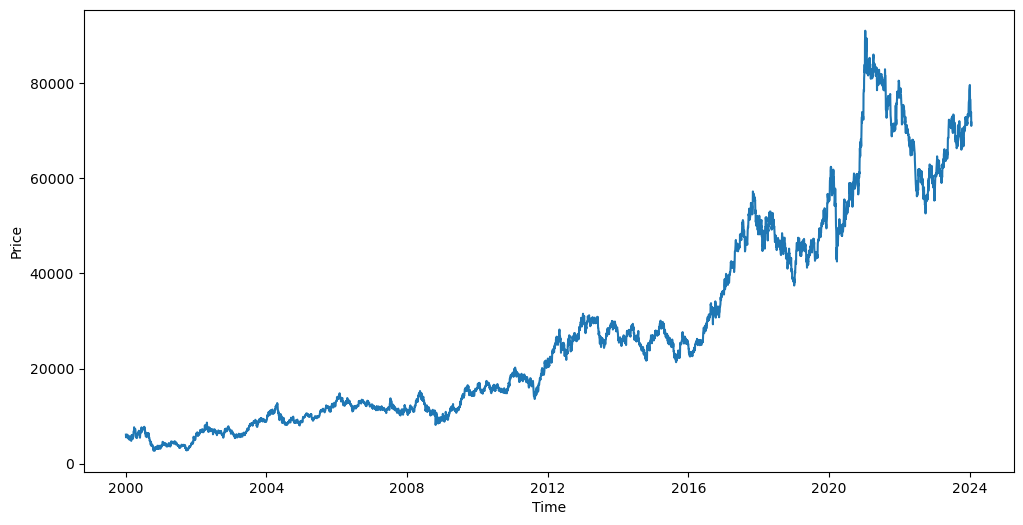

In [11]:
### seaborn lineplot을 이용, 전체 주가 시각화

# 시각화에 필요한 라이브러리 임폴트

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sam, x=df_sam.index, y='Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [12]:
### X / y 데이터 생성
X = df_sam.drop(columns=['Close', 'Change'])
y = df_sam.loc[:,['Close']]

print(X)
print('*'*80)
print(y)

             Open   High    Low    Volume
Date                                     
2000-01-04   6000   6110   5660   1483967
2000-01-05   5800   6060   5520   1493604
2000-01-06   5750   5780   5580   1087810
2000-01-07   5560   5670   5360    806195
2000-01-10   5600   5770   5580    937615
...           ...    ...    ...       ...
2024-01-12  73000  74100  72800  13038939
2024-01-15  73200  74000  73200  13212339
2024-01-16  73500  73700  72500  14760415
2024-01-17  73100  73300  71000  22683660
2024-01-18  71600  72000  70700  17853397

[5936 rows x 4 columns]
********************************************************************************
            Close
Date             
2000-01-04   6110
2000-01-05   5580
2000-01-06   5620
2000-01-07   5540
2000-01-10   5770
...           ...
2024-01-12  73100
2024-01-15  73900
2024-01-16  72600
2024-01-17  71000
2024-01-18  71700

[5936 rows x 1 columns]


In [13]:
# min-max scaling으로 0과 1사이로 만들어주면 손실이 날 경우에

# 종가가 10,000원인데 예측이 9,000원이다. 차이가 1,000원.

# 우리는 손실을 mim squared error가 더 커져버린다. 백만단위..

# 평균제곱오차를 쓰기 때문에 min-max scaling을 쓴다.

# 0.1제곱은 0.01 오히려 오차라 더 작아진다. fit_transform을 쓸 것이다

In [14]:
from sklearn.preprocessing import MinMaxScaler


### Normalization(scaling) 진행 ( 누구다 나 0과 1사이로 재조정 강제로 맞추는 일종의 규제를 가하는 개념 )

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다.
# MinMaxScaler : (X - MIN) / ( MAX - MIN )
'''

#==Tfid Vectorizer 한글 영어 굳이 나눠놨다. 변수가 겹치지 않게 해주는 것보다 훨씬 더 중요하다
# 최소 최대가 다르기 때문에 MinMinScaler는 항상 따로 해줘야 한다.
# x와 y도 변형할 것.

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# scaling 실행
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# y가 1차원이니 2차원으로 변경해야함.


print(f'X_scaled의 모양 : \n{X_scaled.shape}')
print('*'*80)
print(f'X_scaled 확인 : \n{X_scaled}')

print(f'y_scaled의 모양 : \n{y_scaled.shape}')
print('*'*80)
print(f'y_scaled의 확인 : \n{y_scaled}')





X_scaled의 모양 : 
(5936, 4)
********************************************************************************
X_scaled 확인 : 
[[0.06644518 0.06311983 0.06324022 0.01643262]
 [0.06423034 0.06260331 0.06167598 0.01653933]
 [0.06367663 0.05971074 0.06234637 0.0120458 ]
 ...
 [0.81395349 0.76136364 0.81005587 0.16344856]
 [0.80952381 0.7572314  0.79329609 0.25118614]
 [0.79291251 0.74380165 0.78994413 0.19769851]]
y_scaled의 모양 : 
(5936, 1)
********************************************************************************
y_scaled의 확인 : 
[[0.03829161]
 [0.0322873 ]
 [0.03274046]
 ...
 [0.79154866]
 [0.77342245]
 [0.78135267]]


In [15]:
### 시계열 분석에 적합한 데이터를 만들어주는 함수 정의

'''
1. window_size(time step, 시간 간격) 정의
   (1) 얼마 동안(기간)의 주가 데이터에 기반하여 다음날 종가를 예측할 것인가를 정하는 parameter
   (2) 과거 10일을 기반으로 내일 데이터를 예측한다라고 가정했을 때 window_size(시간 간격) = 10이 된다
   (3) 목표 : 과거 10일을 기준으로 그 다음날의 '종가'를 예측할 수 있는 데이터 생성
2.. 순차적으로 10일 동안의 데이터를 하나의 데이터로 묶고,
3. 이에 맞는 label(예측 데이터) 생성
'''

# 우리한테 단어는 특정 날짜의 데이터이다. 특정 날짜 몇개를 잡아서 데이터로 만들것인가..

def make_dataset(X, y, window_size=10):
    X_data_total = []
    y_data_total = []

    for start in np.arange(len(X) - window_size):
        
        # X는 데이터의 숫자 5936, - window_size=10, 5926
        # np.arange(5925,0,1) 스텝만큼 한값 덜 간 값 0부터 5925까지.
        #  0       9
        #   1         10
        #    2          11
        #    5925           5934
        # 뒤에 딱 한 개의 5935가 있는 것이다. 0부터 5935해야 5936개
        
        stop = start + window_size
        X_data = X[start:stop, :]
        X_data_total.append(X_data)
        # 슬라이싱 0 10 --> 0 - 9 
        y_data = y[stop]
        y_data_total.append(y_data)
        # 인덱싱 10을 넣으면 포함됨.
    return np.array(X_data_total), np.array(y_data_total)
    
        

In [16]:
### 시계열 분석에 적합한 데이터 생성 

# windows_size=10인 X, y 데이터 생성

X_data, y_data = make_dataset(X_scaled, y_scaled, window_size=10)

print(f'X_data의 모양 : \n{X_data.shape}')

print('*'*80)

print(f'y_data의 모양 : \n{y_data.shape}')

X_data의 모양 : 
(5926, 10, 4)
********************************************************************************
y_data의 모양 : 
(5926, 1)


In [17]:
### 시계열 분석에 적합한 데이터를 만들어주는 함수 정의

'''
1. window_size(time step, 시간 간격) 정의
   (1) 얼마 동안(기간)의 주가 데이터에 기반하여 다음날 종가를 예측할 것인가를 정하는 parameter
   (2) 과거 10일을 기반으로 내일 데이터를 예측한다라고 가정했을 때 window_size(시간 간격) = 10이 된다
   (3) 목표 : 과거 10일을 기준으로 그 다음날의 '종가'를 예측할 수 있는 데이터 생성
2.. 순차적으로 10일 동안의 데이터를 하나의 데이터로 묶고,
3. 이에 맞는 label(예측 데이터) 생성
'''

def make_dataset(X, y, window_size=10):
    X_data_total = []
    y_data_total = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data = X[start:stop, :]
        X_data_total.append(X_data)
        y_data = y[stop]
        y_data_total.append(y_data)
    return np.array(X_data_total), np.array(y_data_total)

#5교육실 휴먼 2:53 PM


In [28]:
### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의

def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size+1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [29]:
### 학습용 / 검증용 / 평가용 데이터 생성

'''
# TEST_SIZE 설정
   (1) TEST_SIZE = 200으로 설정
   (2) TEST_SIZE = 200은 가장 최근 200일의 데이터로 모델이 주가를 예측
   (3) 학습은 과거부터 200일 이전의 데이터를 학습
'''

## 학습용 / 평가용 데이터로 분할

# 평가용 데이터의 크기 설정
TEST_SIZE = 200

# 학습용 데이터 생성
X_train = X_data[:-200, :, :] #리버스인덱스, 끝번호에서 계산하면 어려울게없다! 
y_train = y_data[:-TEST_SIZE:]


# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:]



## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=0)
# stratify=y_train 분류할때만...
                 
# 결과 확인하기
print(f'학습용 X 데이터의 모양 : {X_train.shape}')
print('*'*80)
print(f'학습용 y 데이터의 모양 : {y_train.shape}')
print('*'*80)

print(f'검증용 X 데이터의 모양 : {X_val.shape}')
print('*'*80)
print(f'검증용 y 데이터의 모양 : {y_val.shape}')

print(f'평가용 X 데이터의 모양 : {X_test.shape}')
print('*'*80)
print(f'평가용 y 데이터의 모양 : {y_test.shape}')

학습용 X 데이터의 모양 : (4580, 10, 4)
********************************************************************************
학습용 y 데이터의 모양 : (4580, 1)
********************************************************************************
검증용 X 데이터의 모양 : (1146, 10, 4)
********************************************************************************
검증용 y 데이터의 모양 : (1146, 1)
평가용 X 데이터의 모양 : (200, 10, 4)
********************************************************************************
평가용 y 데이터의 모양 : (200, 1)


In [30]:
### 시계열 분석에서 마지막 텍스트 데이터 생성
X_last_test = make_last_dataset(X_scaled, 10)
print(X_last_test)

[[0.84939092 0.7964876  0.85363128 0.12517766]
 [0.85271318 0.80061983 0.85363128 0.12279032]
 [0.85714286 0.80268595 0.8301676  0.28812258]
 [0.83056478 0.7768595  0.81787709 0.22434267]
 [0.80730897 0.76033058 0.8122905  0.63884075]
 [0.80841639 0.76549587 0.81340782 0.1443859 ]
 [0.81063123 0.76446281 0.81787709 0.14630604]
 [0.81395349 0.76136364 0.81005587 0.16344856]
 [0.80952381 0.7572314  0.79329609 0.25118614]
 [0.79291251 0.74380165 0.78994413 0.19769851]]


## 주가 예측 모델

In [19]:
'''
모델 정의, feature 데이터의 복잡도가 그렇게 크지 않고 학습해야할 데이터도 10,000개 이하 수준이기 때문에
아주 단순한 모델로도 충분히 좋은 성능을 기대해 볼 수 있습니다. 오히려 너무 복잡한 모델이 과적합을
유발하고, 학습도 잘 되지 못하는 결과를 낳을 수 있다.
'''


# 필요한 라이브러리 임폴트
import tensorflow as tf
import random


# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)


# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               activation='tanh',
                               return_sequences=True, # return_sequences를 넣어야 두번 넣었을 때 의미가 생긴다!
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32,
                               activation='tanh',
                               kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(units=1,
                                kernel_initializer=initializer))


# (첫 행은 10,4열로 들어갔으나 batch_size를 통해 결국 나중에 3차원으로 진행)

# 모델 컴파일
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])


# 모델 확인
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            17664     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30113 (117.63 KB)
Trainable params: 30113 (117.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
### 모델 학습


# 필요한 라이브러리 임폴트
import tensorflow as tf


# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=5)


# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model_fdr.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)


# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=120,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop, checkpoint]
                   )


Epoch 1/120


15/18 [========================>.....] - ETA: 0s - loss: 0.1804 - mse: 0.1804
Epoch 1: val_loss improved from inf to 0.14179, saving model to stock_model_fdr.h5
18/18 [==============================] - 6s 82ms/step - loss: 0.1752 - mse: 0.1752 - val_loss: 0.1418 - val_mse: 0.1418
Epoch 2/120
 8/18 [============>.................] - ETA: 0s - loss: 0.1301 - mse: 0.1301

c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - ETA: 0s - loss: 0.1173 - mse: 0.1173
Epoch 2: val_loss improved from 0.14179 to 0.09185, saving model to stock_model_fdr.h5
18/18 [==============================] - 1s 31ms/step - loss: 0.1173 - mse: 0.1173 - val_loss: 0.0918 - val_mse: 0.0918
Epoch 3/120
16/18 [=========================>....] - ETA: 0s - loss: 0.0739 - mse: 0.0739
Epoch 3: val_loss improved from 0.09185 to 0.05297, saving model to stock_model_fdr.h5
18/18 [==============================] - 0s 28ms/step - loss: 0.0724 - mse: 0.0724 - val_loss: 0.0530 - val_mse: 0.0530
Epoch 4/120
18/18 [==============================] - ETA: 0s - loss: 0.0382 - mse: 0.0382
Epoch 4: val_loss improved from 0.05297 to 0.02375, saving model to stock_model_fdr.h5
18/18 [==============================] - 0s 23ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 5/120
17/18 [===========================>..] - ETA: 0s - loss: 0.0159 - mse: 0.0159
Epoch 5: val_loss improved from

### 평가용 데이터를 이용한 예측

In [21]:
pred= model.predict(X_test)
print(f'최근 200일 동안 삼성전자의 주가에 대한 예측 : \n{pred}')

7/7 [==============================] - 1s 5ms/step
최근 200일 동안 삼성전자의 주가에 대한 예측 : 
[[0.66013217]
 [0.6638203 ]
 [0.6669857 ]
 [0.6713854 ]
 [0.6745637 ]
 [0.6779529 ]
 [0.68184215]
 [0.68522686]
 [0.6884474 ]
 [0.689972  ]
 [0.69199145]
 [0.6948158 ]
 [0.6981212 ]
 [0.70066726]
 [0.7030979 ]
 [0.70569164]
 [0.7087175 ]
 [0.7110554 ]
 [0.71386045]
 [0.71569806]
 [0.7159758 ]
 [0.714926  ]
 [0.7135505 ]
 [0.7119967 ]
 [0.7103242 ]
 [0.71009773]
 [0.70938855]
 [0.70885843]
 [0.7092834 ]
 [0.7089839 ]
 [0.70930177]
 [0.710136  ]
 [0.7115534 ]
 [0.7121604 ]
 [0.7116726 ]
 [0.7106795 ]
 [0.7107623 ]
 [0.7116496 ]
 [0.7126053 ]
 [0.7149748 ]
 [0.7186996 ]
 [0.7238952 ]
 [0.7306045 ]
 [0.7379282 ]
 [0.7442768 ]
 [0.7509659 ]
 [0.7577438 ]
 [0.7628594 ]
 [0.7671914 ]
 [0.7709625 ]
 [0.7745399 ]
 [0.77652556]
 [0.7783305 ]
 [0.77843934]
 [0.7782958 ]
 [0.77914125]
 [0.7787568 ]
 [0.7776106 ]
 [0.77754825]
 [0.77822   ]
 [0.7779959 ]
 [0.77730113]
 [0.77694184]
 [0.7769357 ]
 [0.7774063 ]
 [0.77853

In [22]:
### 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성

df_test = pd.DataFrame(data=y_test, columns=['y_test']) 

df_test['predict'] = pred
date = df_sam.index[-200:] # 최근 200일만 취하겠다
df_test.index = date

# 결과 확인하기

print(df_test)

              y_test   predict
Date                          
2023-03-28  0.681659  0.660132
2023-03-29  0.679393  0.663820
2023-03-30  0.685057  0.666986
2023-03-31  0.694120  0.671385
2023-04-03  0.683924  0.674564
...              ...       ...
2024-01-12  0.797213  0.835464
2024-01-15  0.806276  0.832195
2024-01-16  0.791549  0.827498
2024-01-17  0.773422  0.821519
2024-01-18  0.781353  0.815778

[200 rows x 2 columns]


In [23]:
df_sam

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-01-04,6000,6110,5660,6110,1483967,0.148496
2000-01-05,5800,6060,5520,5580,1493604,-0.086743
2000-01-06,5750,5780,5580,5620,1087810,0.007168
2000-01-07,5560,5670,5360,5540,806195,-0.014235
2000-01-10,5600,5770,5580,5770,937615,0.041516
...,...,...,...,...,...,...
2024-01-12,73000,74100,72800,73100,13038939,-0.001366
2024-01-15,73200,74000,73200,73900,13212339,0.010944
2024-01-16,73500,73700,72500,72600,14760415,-0.017591


In [24]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
pred_inverse = scaler_y.inverse_transform(pred)
print(f'원래 규모의 가격으로 변환시킨 삼성 전자에 주가 예측 : \n{pred_inverse}')
df_test['test_origin'] = df_sam.loc['2023-03-28':,'Close']
print(df_test)
print('*'*80)
df_test['pred_origin'] = pred_inverse
print(df_test)
print('*'*80)
error = df_test.loc[:,'test_origin'] - df_test.loc[:,'pred_origin']
df_test['error']=error

# 결과 확인하기

df_test

원래 규모의 가격으로 변환시킨 삼성 전자에 주가 예측 : 
[[60999.867]
 [61325.42 ]
 [61604.83 ]
 [61993.19 ]
 [62273.74 ]
 [62572.902]
 [62916.207]
 [63214.977]
 [63499.254]
 [63633.83 ]
 [63812.086]
 [64061.39 ]
 [64353.156]
 [64577.9  ]
 [64792.45 ]
 [65021.402]
 [65288.496]
 [65494.86 ]
 [65742.46 ]
 [65904.67 ]
 [65929.19 ]
 [65836.516]
 [65715.1  ]
 [65577.945]
 [65430.32 ]
 [65410.33 ]
 [65347.727]
 [65300.934]
 [65338.445]
 [65312.008]
 [65340.066]
 [65413.703]
 [65538.82 ]
 [65592.4  ]
 [65549.34 ]
 [65461.676]
 [65468.992]
 [65547.31 ]
 [65631.67 ]
 [65840.83 ]
 [66169.61 ]
 [66628.23 ]
 [67220.46 ]
 [67866.92 ]
 [68427.31 ]
 [69017.76 ]
 [69616.05 ]
 [70067.6  ]
 [70449.984]
 [70782.86 ]
 [71098.63 ]
 [71273.914]
 [71433.234]
 [71442.84 ]
 [71430.17 ]
 [71504.8  ]
 [71470.86 ]
 [71369.69 ]
 [71364.19 ]
 [71423.48 ]
 [71403.695]
 [71342.375]
 [71310.66 ]
 [71310.12 ]
 [71351.65 ]
 [71451.34 ]
 [71598.5  ]
 [71827.266]
 [72061.15 ]
 [72297.195]
 [72330.125]
 [72285.64 ]
 [72141.31 ]
 [71975.46 ]
 [717

,y_test,predict,test_origin,pred_origin,error
Date,,,,,
2023-03-28,0.681659,0.660132,62900,60999.867188,1900.132812
2023-03-29,0.679393,0.663820,62700,61325.421875,1374.578125
2023-03-30,0.685057,0.666986,63200,61604.828125,1595.171875
2023-03-31,0.694120,0.671385,64000,61993.191406,2006.808594
2023-04-03,0.683924,0.674564,63100,62273.738281,826.261719
...,...,...,...,...,...
2024-01-12,0.797213,0.835464,73100,76476.382812,-3376.382812
2024-01-15,0.806276,0.832195,73900,76187.890625,-2287.890625
2024-01-16,0.791549,0.827498,72600,75773.281250,-3173.281250


## 예측 결과 시각화

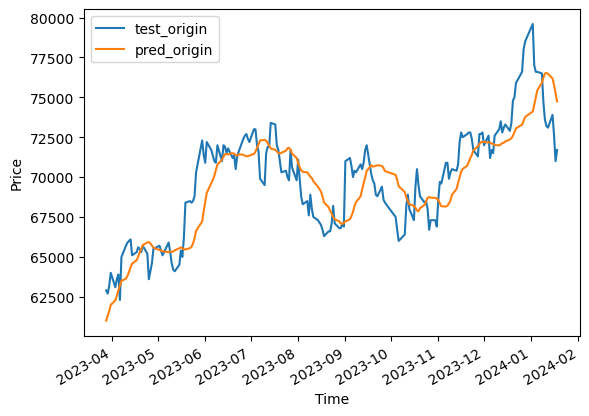

In [25]:
## 결과 시각화
df_test.loc[:, ['test_origin', 'pred_origin']].plot(kind='line')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

## 다음날 주가 예측


In [36]:
### 1월 19일 종가 예측하기 --> 마지막 평가용 데이터 이용

# 마지막 평가용 데이터의 모양 확인
print(X_last_test) # 2차원이므로 3차원으로 변환해줘야함.

# 모양 변환 : 2차원 --> 3차원
X_last_test = X_last_test.reshape((1, 10, 4))

# 모델에 의한 예측 실행
pred_last = model.predict(X_last_test)
print(pred_last)
# inverse_transform 써서 다시 변환해줘야함.


# 스케일링 이전의 상태로 복원
stock_price = scaler_y.inverse_transform(pred_last)
print(f'1월 19일 삼성전자의 주가는 = {stock_price}')

[[[0.84939092 0.7964876  0.85363128 0.12517766]
  [0.85271318 0.80061983 0.85363128 0.12279032]
  [0.85714286 0.80268595 0.8301676  0.28812258]
  [0.83056478 0.7768595  0.81787709 0.22434267]
  [0.80730897 0.76033058 0.8122905  0.63884075]
  [0.80841639 0.76549587 0.81340782 0.1443859 ]
  [0.81063123 0.76446281 0.81787709 0.14630604]
  [0.81395349 0.76136364 0.81005587 0.16344856]
  [0.80952381 0.7572314  0.79329609 0.25118614]
  [0.79291251 0.74380165 0.78994413 0.19769851]]]
1/1 [==============================] - 0s 31ms/step
[[0.81089324]]
1월 19일 삼성전자의 주가는 = [[74307.55]]
